# Imports

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [45]:
# TODO Uncomment if your running on Google Colab 
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# TODO Change Path
# If using Google Colab, it should look similar to the first link
#pthname = '/content/drive/MyDrive/ECS 171/Project/Sleep_health_and_lifestyle_dataset.csv'
pthname = 'Sleep_health_and_lifestyle_dataset.csv'

# Load Data and Data Cleaning

In [5]:
df = pd.read_csv(pthname)

## Data Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [60]:
df.shape

(374, 13)

## Missing Values

In [50]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [51]:
df['Sleep Disorder'].fillna('No Disorder', inplace=True)

# Exploratory Data Analysis

## Summary Statistics

In [52]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Data Distribution

In [68]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns.drop('Person ID')
categorical_columns = df.select_dtypes(include=['object']).columns

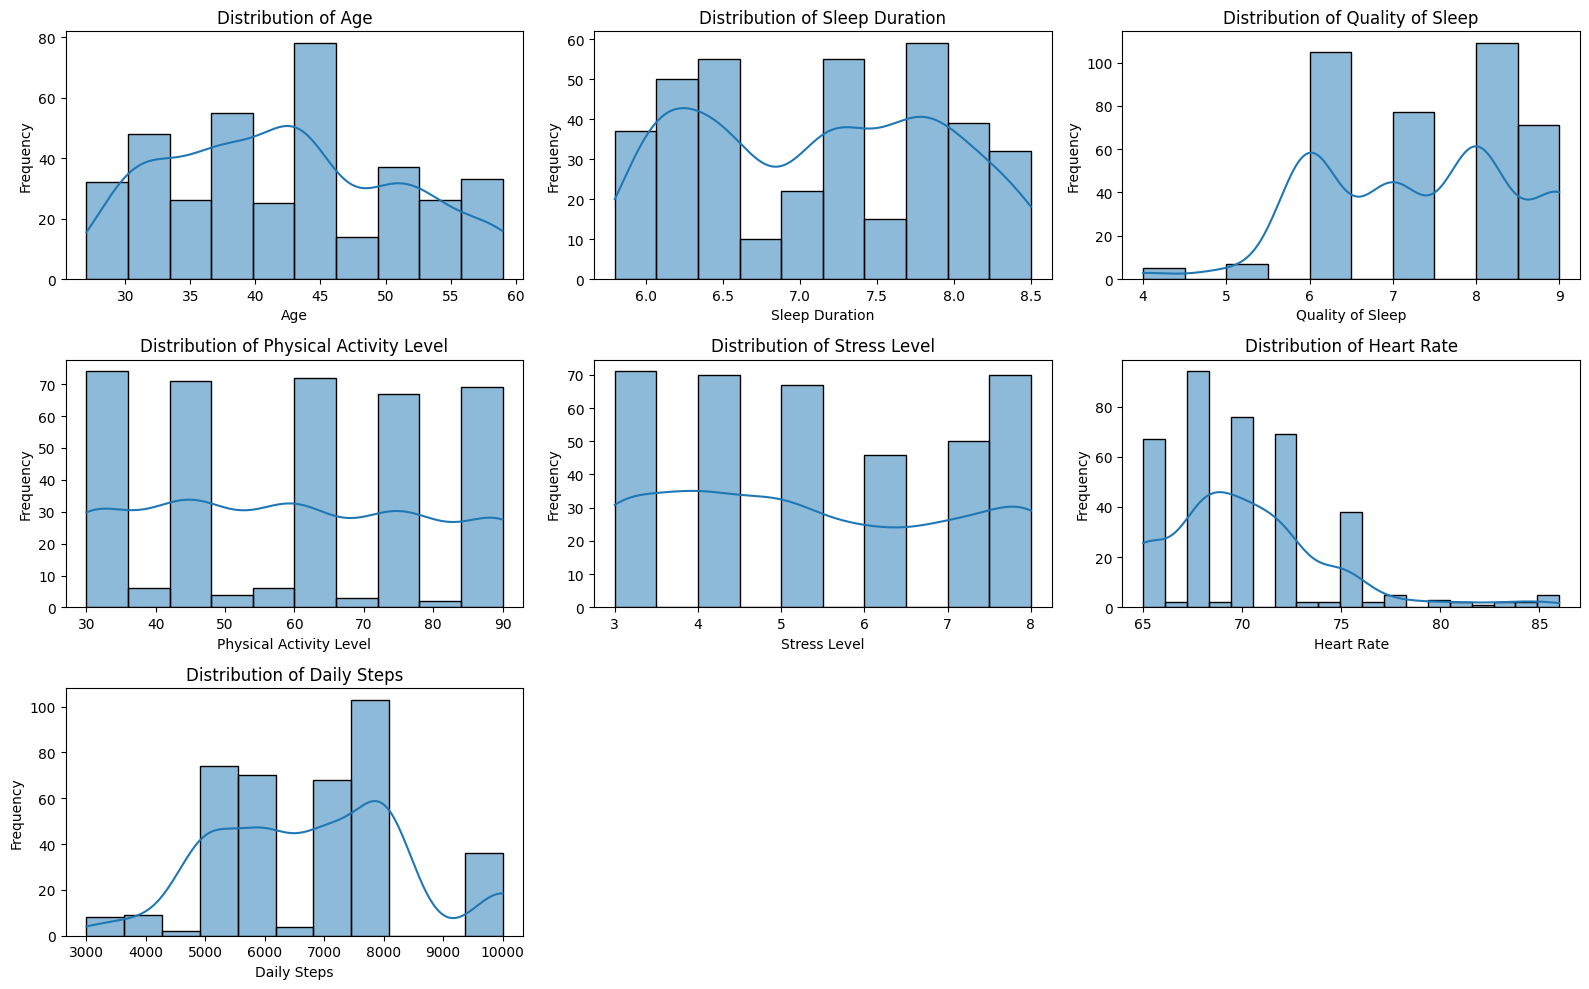

In [69]:
plt.figure(figsize=(16,10))
for i, col in enumerate(numerical_columns, 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

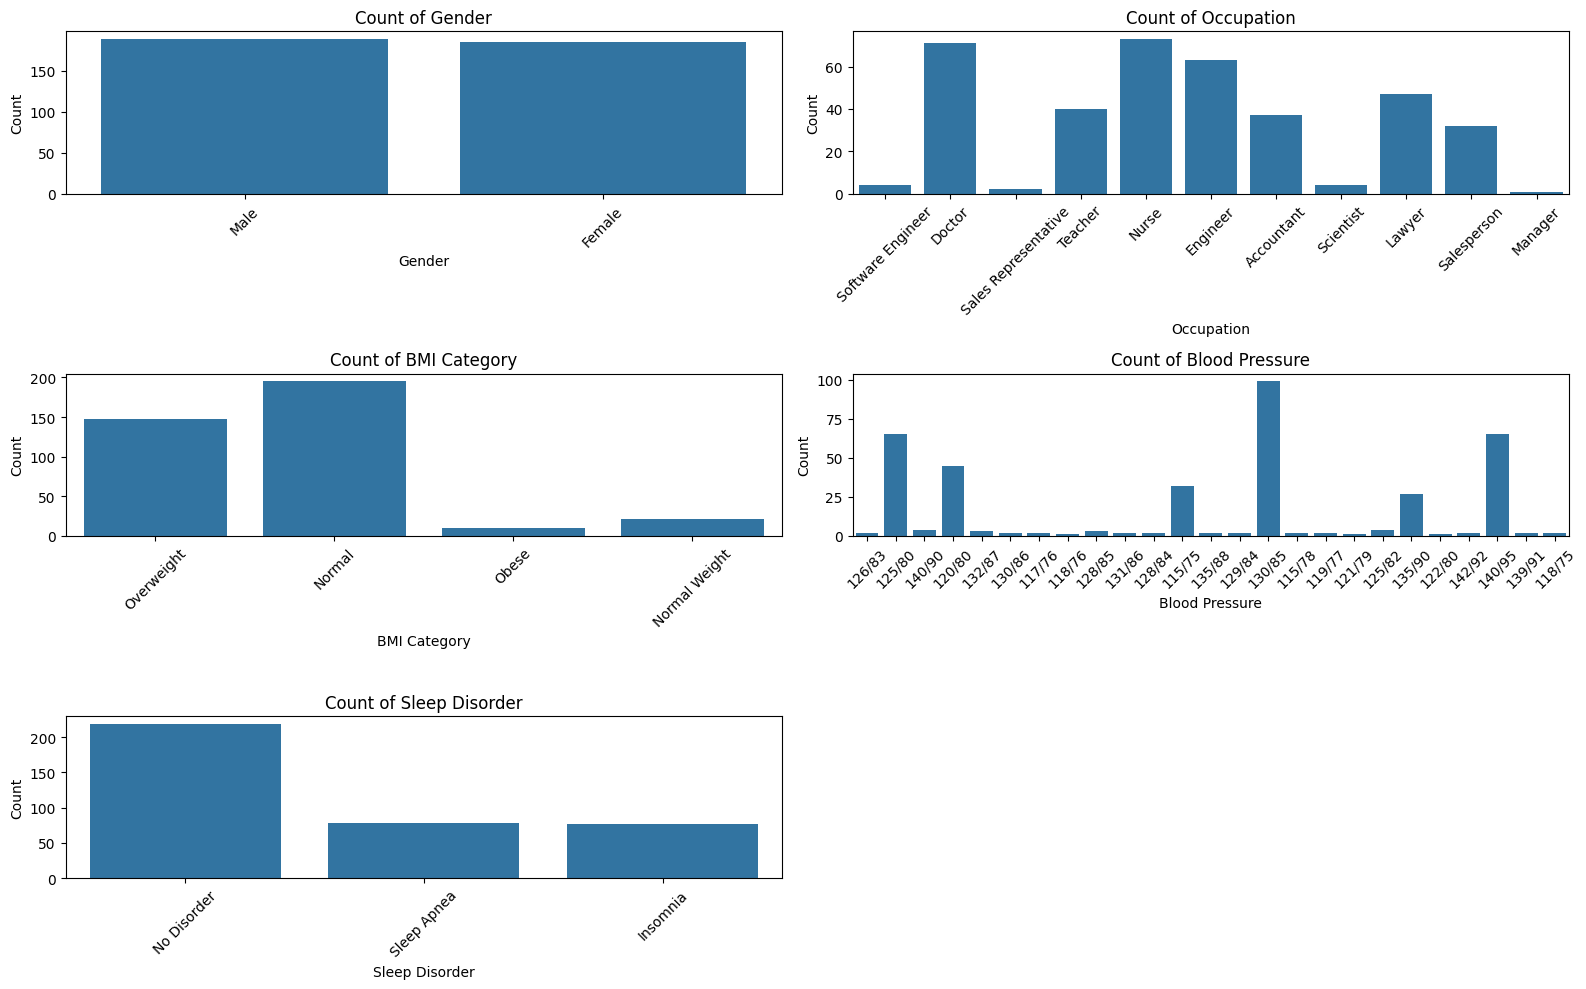

In [70]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_columns, 1):
  plt.subplot(3, 2, i)
  sns.countplot(x=col, data=df)
  plt.title(f"Count of {col}")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Explore Relationships

### Amongst All

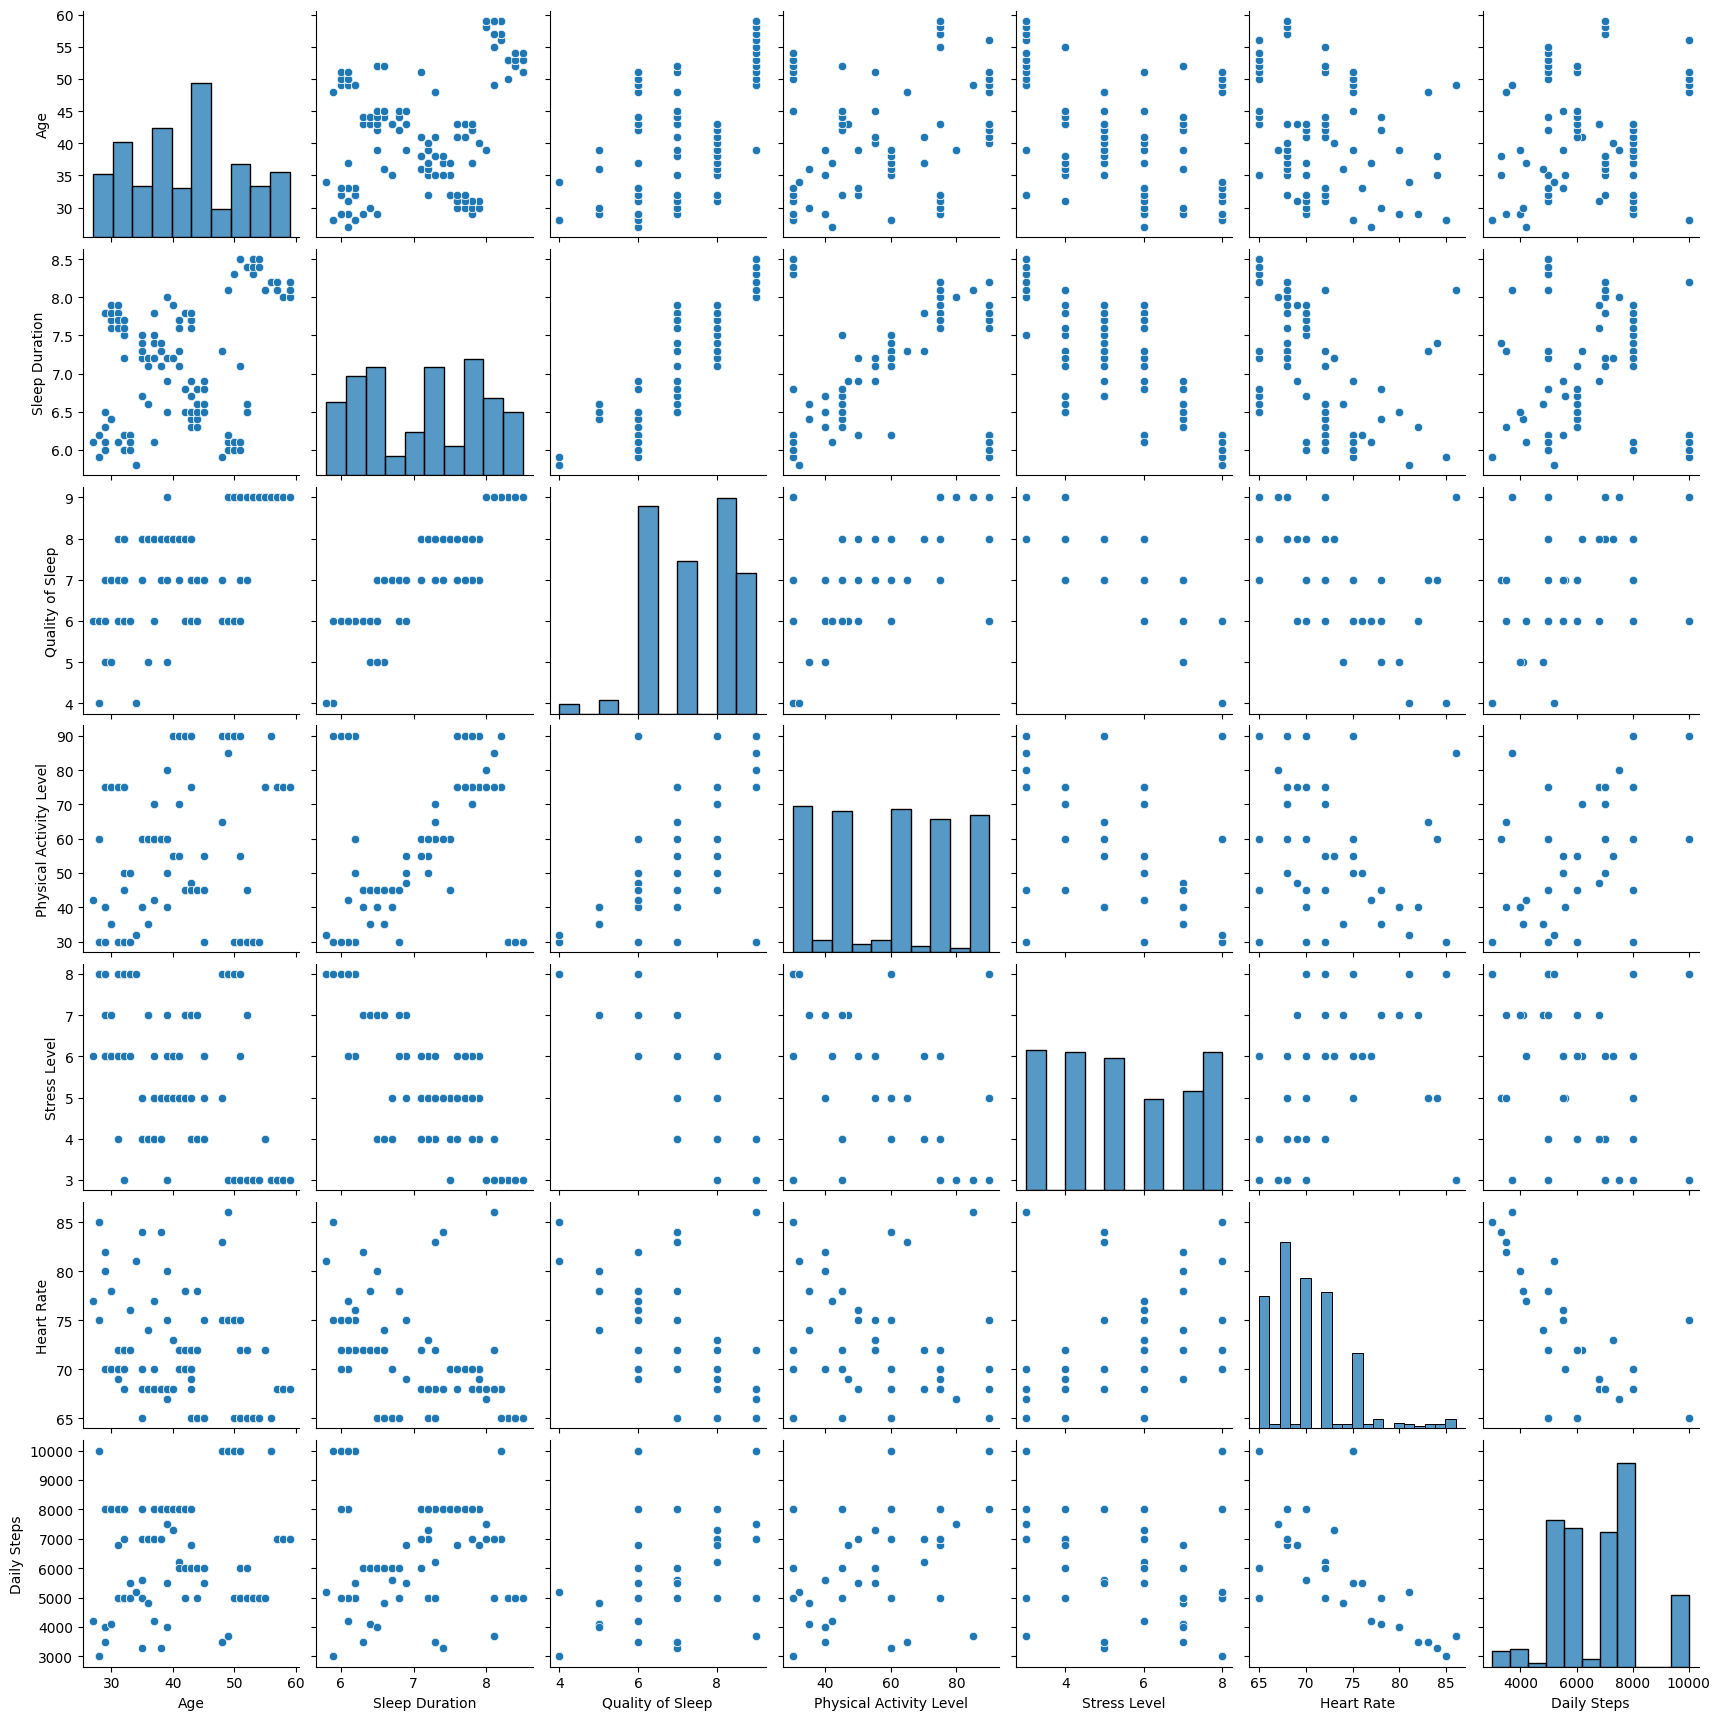

In [75]:
sns.pairplot(df[df.columns[df.columns.isin(numerical_columns)]])
plt.show()

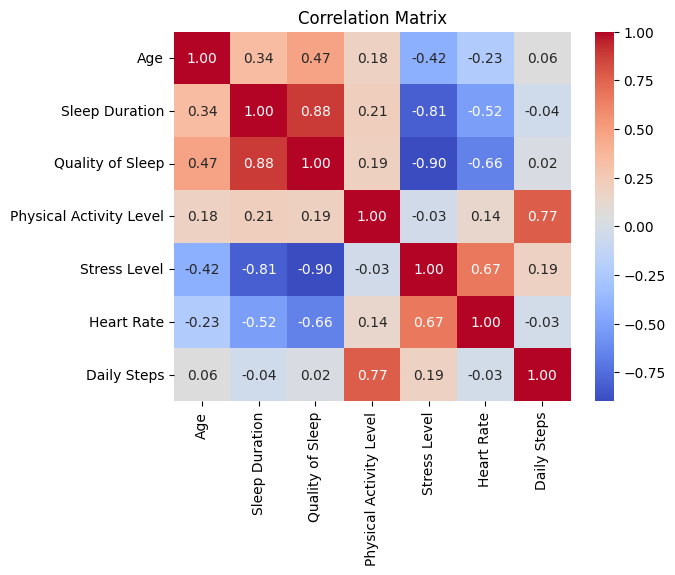

In [71]:
correlation_matrix = df[df.columns[df.columns.isin(numerical_columns)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### In Relation to Stress

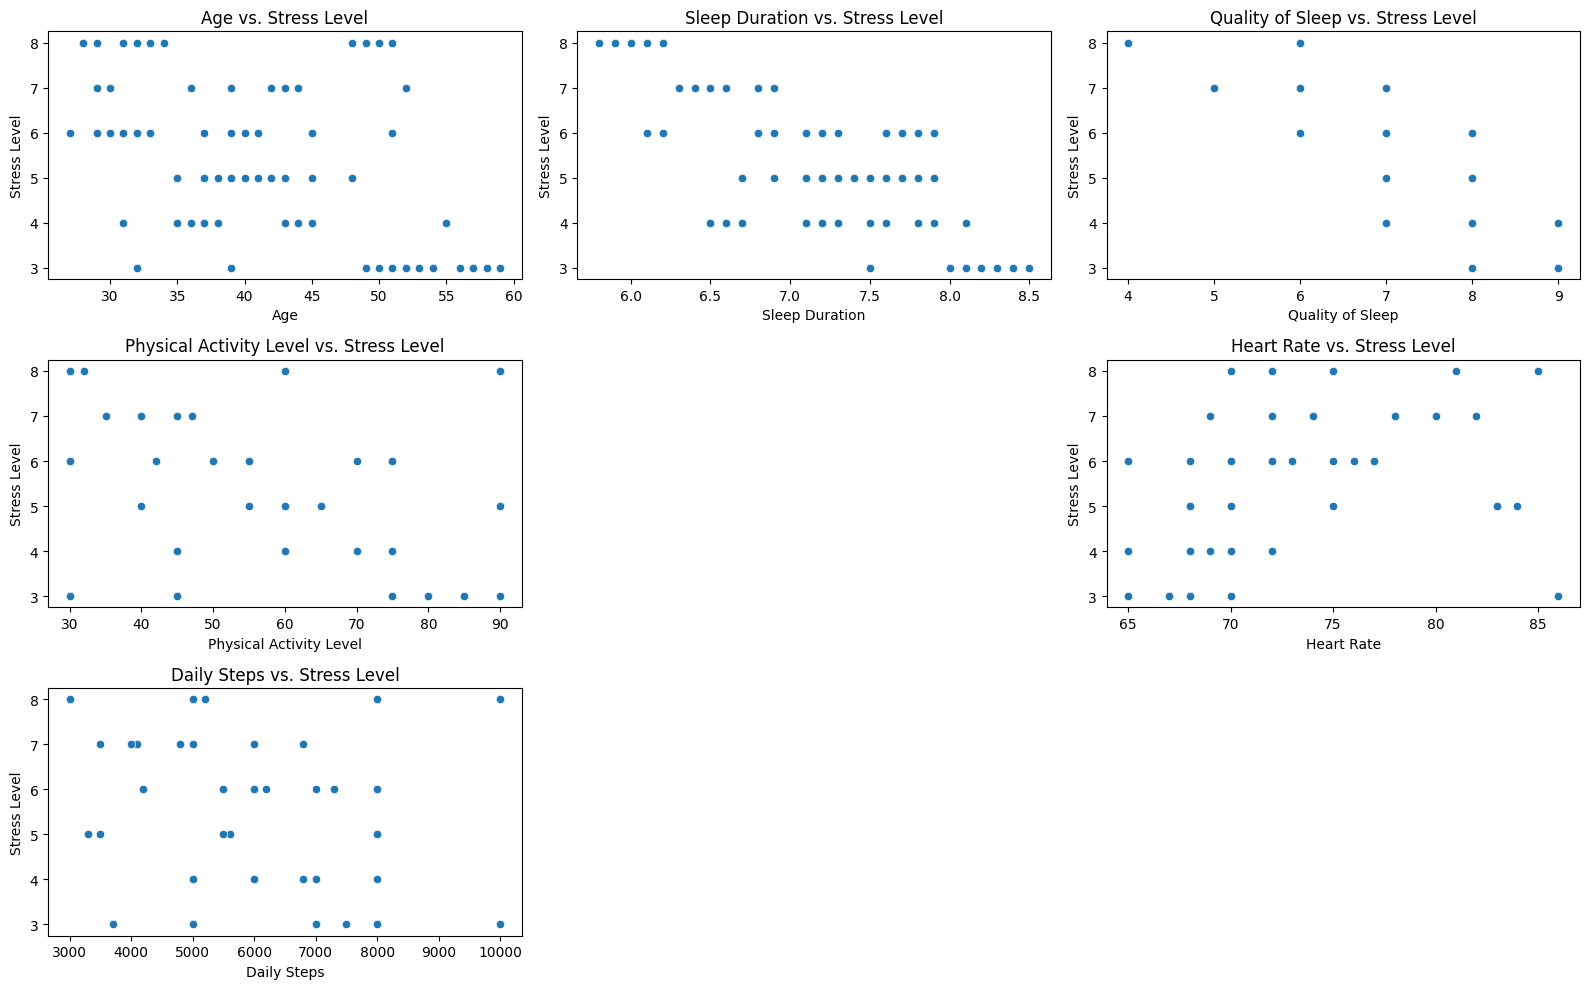

In [79]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
  if col == 'Stress Level':
    continue
  plt.subplot(3,3,i)
  sns.scatterplot(x=col, y='Stress Level', data=df)
  plt.title(f"{col} vs. Stress Level")
  plt.xlabel(col)
  plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

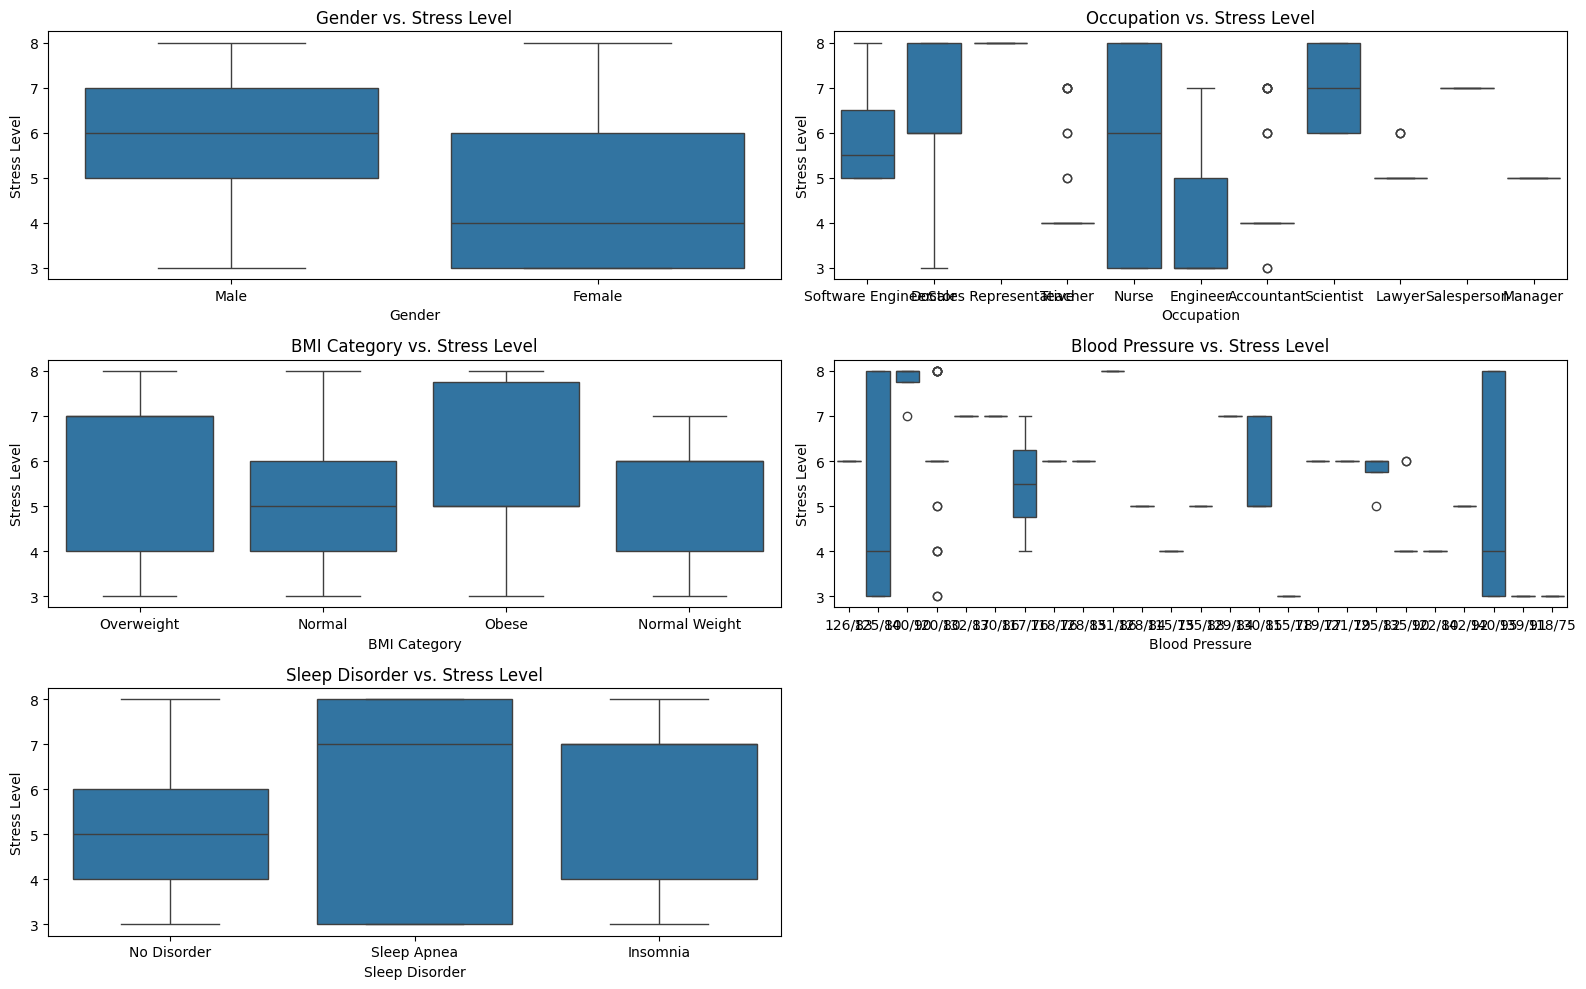

In [82]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_columns, 1):
  plt.subplot(3,2,i)
  sns.boxplot(x=col, y='Stress Level', data=df)
  plt.title(f"{col} vs. Stress Level")
  plt.xlabel(col)
  plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()